# PARTIAL EXAM – Python in Data Science

Use the data sets you have worked with so far, or if needed, download a more suitable data set from the following link for your analysis: https://www.gapminder.org/data/. Your task is to analyze and propose which country would be the best to live in if you are:

- A young person up to 27 years old
- A young couple planning to have or already having small children
- A person who has been retired for a few months or has been retired for several months

In addition to age conditions, be sure to include gender data in your analysis, as some countries, despite their level of development, still have pronounced external discrimination (for example, in Switzerland, women needed their husband's approval to be employed or open a bank account until 1985).

Justify your proposal with a graphical representation of the data on which your conclusions are based.

The proposal with all the details and criteria used to reach your conclusion should be in the format of a Jupyter Notebook.

Define and explain at least five prerequisites for a good quality of life for any of the mentioned groups. Examples include:

- Education system
- Economic development of the country
- Availability of services such as internet or mobile phone access
- Ecology
- Infrastructure
- Health care
  …

Tip: If it helps, imagine you are asking someone you know for this question. It is important that this person is in one of the three mentioned age groups. For example, you could ask a friend, acquaintance, or a family member. Knowing the person may help you better assess which conditions are more important for them.


In [40]:
from pandas import read_csv, concat, Series, DataFrame

In [41]:
# Read DataFrame from CSV
df = read_csv("facts_countries.csv", sep=";", skiprows=[1])

df.head()

,Country,Area(sq km),Birth rate(births/1000 population),Current account balance,Death rate(deaths/1000 population),Debt - external,Electricity - consumption(kWh),Electricity - production(kWh),Exports,GDP,...,Oil - production(bbl/day),Oil - proved reserves(bbl),Population,Public debt(% of GDP),Railways(km),Reserves of foreign exchange & gold,Telephones - main lines in use,Telephones - mobile cellular,Total fertility rate(children born/woman),Unemployment rate(%)
0,Afghanistan,647500,47.02,NaN,20.75,8.000000e+09,6.522000e+08,5.400000e+08,4.460000e+08,2.150000e+10,...,0.0,0.000000e+00,29928987.0,NaN,NaN,NaN,33100.0,15000.0,6.75,NaN
1,Akrotiri,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,28748,15.08,-5.040000e+08,5.12,1.410000e+09,6.760000e+09,5.680000e+09,5.524000e+08,1.746000e+10,...,2000.0,1.855000e+08,3563112.0,NaN,447.0,1.206000e+09,255000.0,1100000.0,2.04,14.8
3,Algeria,2381740,17.13,1.190000e+10,4.60,2.190000e+10,2.361000e+10,2.576000e+10,3.216000e+10,2.123000e+11,...,1200000.0,1.187000e+10,32531853.0,37.4,3973.0,4.355000e+10,2199600.0,1447310.0,1.92,25.4
4,American Samoa,199,23.13,NaN,3.33,NaN,1.209000e+08,1.300000e+08,3.000000e+07,5.000000e+08,...,0.0,NaN,57881.0,NaN,NaN,NaN,15000.0,2377.0,3.25,6.0


In [42]:
# Convert all column names in the DataFrame to lowercase and replace spaces with underscores
df.columns = map(
    lambda column: column.lower().replace(" ", "_"),
    df.columns,
)

df.head()

,country,area(sq_km),birth_rate(births/1000_population),current_account_balance,death_rate(deaths/1000_population),debt_-_external,electricity_-_consumption(kwh),electricity_-_production(kwh),exports,gdp,...,oil_-_production(bbl/day),oil_-_proved_reserves(bbl),population,public_debt(%_of_gdp),railways(km),reserves_of_foreign_exchange_&_gold,telephones_-_main_lines_in_use,telephones_-_mobile_cellular,total_fertility_rate(children_born/woman),unemployment_rate(%)
0,Afghanistan,647500,47.02,NaN,20.75,8.000000e+09,6.522000e+08,5.400000e+08,4.460000e+08,2.150000e+10,...,0.0,0.000000e+00,29928987.0,NaN,NaN,NaN,33100.0,15000.0,6.75,NaN
1,Akrotiri,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Albania,28748,15.08,-5.040000e+08,5.12,1.410000e+09,6.760000e+09,5.680000e+09,5.524000e+08,1.746000e+10,...,2000.0,1.855000e+08,3563112.0,NaN,447.0,1.206000e+09,255000.0,1100000.0,2.04,14.8
3,Algeria,2381740,17.13,1.190000e+10,4.60,2.190000e+10,2.361000e+10,2.576000e+10,3.216000e+10,2.123000e+11,...,1200000.0,1.187000e+10,32531853.0,37.4,3973.0,4.355000e+10,2199600.0,1447310.0,1.92,25.4
4,American Samoa,199,23.13,NaN,3.33,NaN,1.209000e+08,1.300000e+08,3.000000e+07,5.000000e+08,...,0.0,NaN,57881.0,NaN,NaN,NaN,15000.0,2377.0,3.25,6.0


In [43]:
# Set the DataFrame index to be the values from the 'country' column
df.index = df["country"]

# Convert all index values to lowercase and replace spaces with underscores
df.index = map(
    lambda row: row.lower().replace(" ", "_"),
    df.index,
)

# Drop the 'country' column from the DataFrame as it is no longer needed
df = df.drop("country", axis=1)

df.head()

,area(sq_km),birth_rate(births/1000_population),current_account_balance,death_rate(deaths/1000_population),debt_-_external,electricity_-_consumption(kwh),electricity_-_production(kwh),exports,gdp,gdp_-_per_capita,...,oil_-_production(bbl/day),oil_-_proved_reserves(bbl),population,public_debt(%_of_gdp),railways(km),reserves_of_foreign_exchange_&_gold,telephones_-_main_lines_in_use,telephones_-_mobile_cellular,total_fertility_rate(children_born/woman),unemployment_rate(%)
afghanistan,647500,47.02,NaN,20.75,8.000000e+09,6.522000e+08,5.400000e+08,4.460000e+08,2.150000e+10,800.0,...,0.0,0.000000e+00,29928987.0,NaN,NaN,NaN,33100.0,15000.0,6.75,NaN
akrotiri,123,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
albania,28748,15.08,-5.040000e+08,5.12,1.410000e+09,6.760000e+09,5.680000e+09,5.524000e+08,1.746000e+10,4900.0,...,2000.0,1.855000e+08,3563112.0,NaN,447.0,1.206000e+09,255000.0,1100000.0,2.04,14.8
algeria,2381740,17.13,1.190000e+10,4.60,2.190000e+10,2.361000e+10,2.576000e+10,3.216000e+10,2.123000e+11,6600.0,...,1200000.0,1.187000e+10,32531853.0,37.4,3973.0,4.355000e+10,2199600.0,1447310.0,1.92,25.4
american_samoa,199,23.13,NaN,3.33,NaN,1.209000e+08,1.300000e+08,3.000000e+07,5.000000e+08,8000.0,...,0.0,NaN,57881.0,NaN,NaN,NaN,15000.0,2377.0,3.25,6.0


In [44]:
# Create an empty list to store index values
indexes = []
for index in df.index:
    indexes.append(index)

indexes

['afghanistan',
 'akrotiri',
 'albania',
 'algeria',
 'american_samoa',
 'andorra',
 'angola',
 'anguilla',
 'antarctica',
 'antigua_and_barbuda',
 'argentina',
 'armenia',
 'aruba',
 'ashmore_and_cartier_islands',
 'australia',
 'austria',
 'azerbaijan',
 'bahamas_the',
 'bahrain',
 'baker_island',
 'bangladesh',
 'barbados',
 'bassas_da_india',
 'belarus',
 'belgium',
 'belize',
 'benin',
 'bermuda',
 'bhutan',
 'bolivia',
 'bosnia_and_herzegovina',
 'botswana',
 'bouvet_island',
 'brazil',
 'british_indian_ocean_territory',
 'british_virgin_islands',
 'brunei',
 'bulgaria',
 'burkina_faso',
 'burma',
 'burundi',
 'cambodia',
 'cameroon',
 'canada',
 'cape_verde',
 'cayman_islands',
 'central_african_republic',
 'chad',
 'chile',
 'china',
 'christmas_island',
 'clipperton_island',
 'cocos_(keeling)_islands',
 'colombia',
 'comoros',
 'congo_democratic_republic_of_the',
 'congo_republic_of_the',
 'cook_islands',
 'costa_rica',
 "cote_d'ivoire",
 'croatia',
 'cuba',
 'cyprus',
 'czech

In [45]:
# Create an empty list to store column names
columns = []
for column in df.columns:
    columns.append(column)

columns

['area(sq_km)',
 'birth_rate(births/1000_population)',
 'current_account_balance',
 'death_rate(deaths/1000_population)',
 'debt_-_external',
 'electricity_-_consumption(kwh)',
 'electricity_-_production(kwh)',
 'exports',
 'gdp',
 'gdp_-_per_capita',
 'gdp_-_real_growth_rate(%)',
 'hiv/aids_-_adult_prevalence_rate(%)',
 'hiv/aids_-_deaths',
 'hiv/aids_-_people_living_with_hiv/aids',
 'highways(km)',
 'imports',
 'industrial_production_growth_rate(%)',
 'infant_mortality_rate(deaths/1000_live_births)',
 'inflation_rate_(consumer_prices)(%)',
 'internet_hosts',
 'internet_users',
 'investment_(gross_fixed)(%_of_gdp)',
 'labor_force',
 'life_expectancy_at_birth(years)',
 'military_expenditures_-_dollar_figure',
 'military_expenditures_-_percent_of_gdp(%)',
 'natural_gas_-_consumption(cu_m)',
 'natural_gas_-_exports(cu_m)',
 'natural_gas_-_imports(cu_m)',
 'natural_gas_-_production(cu_m)',
 'natural_gas_-_proved_reserves(cu_m)',
 'oil_-_consumption(bbl/day)',
 'oil_-_exports(bbl/day)',
 '

Large countries might have higher absolute numbers for metrics simply due to their size or population.

Per capita and per area calculations remove this bias, making it easier to analyze and compare countries of different sizes and populations.


In [46]:
# Calculate per capita/area values
df["internet_users(%)"] = (df["internet_users"] / df["population"]) * 100
df["labor_force(%)"] = (df["labor_force"] / df["population"]) * 100
df["telephones_-_mobile_cellular_per_capita"] = (
    df["telephones_-_mobile_cellular"] / df["population"]
)
df["natural_gas_-_consumption(cu_m_per_capita)"] = (
    df["natural_gas_-_consumption(cu_m)"] / df["population"]
)
df["oil_-_consumption(bbl_per_capita)"] = (
    df["oil_-_consumption(bbl/day)"] / df["population"]
)
df["electricity_-_consumption(kwh_per_capita)"] = (
    df["electricity_-_consumption(kwh)"] / df["population"]
)
df["highways_density(highways(km)_/_area(sq_km))"] = (
    df["highways(km)"] / df["area(sq_km)"]
)
df["railways_density(railways(km)_/_area(sq_km))"] = (
    df["railways(km)"] / df["area(sq_km)"]
)

## `apply` method

The `apply` method in Pandas iterates over Series of data, either **row-wise** or **column-wise**, based on the axis parameter. This is akin to iterating over rows in a loop with `for row in rows` or over columns with `for column in columns`, and applying the specified function to each row or column.

### Iteration Concept in `apply`

#### Row-wise Iteration (`axis=1`)

When you apply a function with `axis=1`, Pandas iterates over each row. The function you provide will be applied to each row, and each row is passed as a Series to the function.

```python
# Function to sum each row
def sum_row(row):
    return row.sum()

# Apply the function row-wise
row_sums = df.apply(sum_row, axis=1)
```

In this case, the function `sum_row` receives each row as a Series, one by one.

#### Column-wise Iteration (`axis=0`)

When you apply a function with `axis=0` (the default), Pandas iterates over each column. The function you provide will be applied to each column, and each column is passed as a Series to the function.

```python
# Function to sum each column
def sum_column(col):
    return col.sum()

# Apply the function column-wise
column_sums = df.apply(sum_column, axis=0)
```

In this case, the function sum_column receives each column as a Series, one by one.

- When you use the `apply` method with `axis=0` (which is the default), Pandas knows to apply the function to **each column**. The `axis=0` parameter tells Pandas to **iterate over columns**.
- When you use the `apply` method with `axis=1`, Pandas knows to apply the function to **each row**. The `axis=1` parameter tells Pandas to iterate **over rows**.


In [47]:
# Define a function to normalize a single series (e.g. row, column)
def normalize(series: Series) -> float:
    """Normalize a Pandas Series to a range between 0 and 1.

    This function takes a Pandas Series and applies min-max normalization to
    scale the values such that the minimum value in the series is 0 and the
    maximum value is 1. This is useful for ensuring that different series
    are comparable on a common scale.

    Args:
        series (Series): The Pandas Series to be normalized.

    Returns:
        Series: A new Pandas Series with values normalized between 0 and 1.
    """
    return (series - series.min()) / (series.max() - series.min())

## Gender equality data

The point of this code is to process a DataFrame of gender equality data by standardizing column names and index values, then to focus on the last three indicators of gender equality, compute an overall average score for these indicators for each country, and retain only this computed score in the final DataFrame.

This results in a simplified DataFrame that provides a single gender equality index for each country.


In [48]:
# Read DataFrame from CSV
ge_df = read_csv("gender_equality.csv")

# Convert all column names in the DataFrame to lowercase and replace spaces with underscores
ge_df.columns = map(
    lambda column: column.lower().replace(" ", "_"),
    ge_df.columns,
)

# Set the DataFrame index to be the values from the 'country' column
ge_df.index = ge_df["country"]

# Convert all index values to lowercase and replace spaces with underscores
ge_df.index = map(
    lambda row: row.lower().replace(" ", "_"),
    ge_df.index,
)

# Drop the 'country' column from the DataFrame as it is no longer needed
ge_df = ge_df.drop("country", axis=1)

# Select the last 3 columns of the DataFrame
ge_df = ge_df.iloc[:, -3:]

# Calculate the mean of the selected columns for each row and assign it to a new column 'gender_equality_index'
ge_df["gender_equality_index"] = ge_df.mean(axis=1)

# Drop the first 3 columns of the DataFrame (the original 3 columns that were kept in the previous step)
ge_df = ge_df.drop(
    ge_df.iloc[:, :3],
    axis=1,
)

# Normalize gender_equality_index (0-1)
ge_df = ge_df.apply(func=normalize, axis=0)

ge_df

,gender_equality_index
afghanistan,0.136283
angola,0.454790
albania,0.588303
uae,0.348211
argentina,0.726433
...,...
vanuatu,0.362832
yemen,0.000000
south_africa,0.560600
zambia,0.464409


## Education System

Create a ranked list of countries based on a composite rating, which is derived from normalized values ​​to consider:

- `gdp_-_per_capita`
  - Indicates economic capability to invest in education.
  - More is better
- `internet_users(%)`
  - Reflects access to internet resources relative to the population size.
  - More is better
- `labor_force(%)`
  - Measures the proportion of the population engaged in labor, reflecting the availability of educated and skilled workers.
  - More is better

1. Normalizing each selected column first...
1. ... and then computing a composite rating based on the product of these normalized values.


In [49]:
# Select specific columns and normalize them
education_df = df[
    [
        "gdp_-_per_capita",
        "internet_users(%)",
        "labor_force(%)",
    ]
].apply(func=normalize, axis=0)

# Drop rows with any NaN values after normalization
education_df = education_df.dropna(axis=0)

# Calculate a 'rating' column as the product of the values in the selected columns
education_df["education_rating"] = education_df.prod(axis=1)

# Sort the DataFrame by the 'rating' column in descending order
education_df = education_df.sort_values(by="education_rating", axis=0, ascending=False)

# Show only the top 10 rows based on the highest ratings
education_df.head(10)

,gdp_-_per_capita,internet_users(%),labor_force(%),education_rating
luxembourg,1.000000,0.535829,0.663013,0.355262
liechtenstein,0.420513,0.902643,0.912178,0.346238
monaco,0.454701,0.751249,1.000000,0.341594
iceland,0.538462,1.000000,0.562616,0.302947
san_marino,0.584615,0.753475,0.677732,0.298536
bermuda,0.608547,0.803166,0.605814,0.296100
united_states,0.678632,0.818140,0.525904,0.291991
norway,0.676923,0.758029,0.547002,0.280682
united_arab_emirates,0.423932,0.659086,0.976919,0.272959
denmark,0.543590,0.772011,0.557835,0.234099


## Economic Development

Create a ranked list of countries based on a composite rating, which is derived from normalized values ​​to consider:

- `gdp_-_per_capita`
  - Standardizes economic output by population size.
  - More is better
- `gdp_-_real_growth_rate(%)`
  - Indicates economic growth independent of size.
  - More is better
- `investment_(gross_fixed)(%_of_gdp)`
  - Reflects investment relative to the economy.
  - More is better
- `public_debt(%_of_gdp)`
  - Shows debt burden relative to economic size.
  - Less is better
- `inflation_rate_(consumer_prices)(%)`
  - Indicates price stability.
  - Less is better

1. Normalizing each selected column first...
1. ... and then computing a composite rating based on the product of these normalized values.


In [50]:
# Select specific columns and normalize them
economic_df = df[
    [
        "gdp_-_per_capita",
        "gdp_-_real_growth_rate(%)",
        "investment_(gross_fixed)(%_of_gdp)",
        "public_debt(%_of_gdp)",
        "inflation_rate_(consumer_prices)(%)",
    ]
].apply(func=normalize, axis=0)

# Invert specific columns so that lower is better
economic_df["public_debt(%_of_gdp)"] = 1 - economic_df["public_debt(%_of_gdp)"]
economic_df["inflation_rate_(consumer_prices)(%)"] = (
    1 - economic_df["inflation_rate_(consumer_prices)(%)"]
)

# Drop rows with any NaN values after normalization
economic_df = economic_df.dropna(axis=0)

# Calculate a 'rating' column as the product of the values in the selected columns
economic_df["economic_rating"] = economic_df.prod(axis=1)

# Sort the DataFrame by the 'rating' column in descending order
economic_df = economic_df.sort_values(by="economic_rating", axis=0, ascending=False)

# Show only the top 10 rows based on the highest ratings
economic_df.head(10)

,gdp_-_per_capita,gdp_-_real_growth_rate(%),investment_(gross_fixed)(%_of_gdp),public_debt(%_of_gdp),inflation_rate_(consumer_prices)(%),economic_rating
hong_kong,0.577778,0.266116,0.257443,1.000000,0.975842,0.038627
ireland,0.538462,0.219835,0.276708,0.871353,0.957540,0.027329
australia,0.517949,0.193388,0.302977,0.932361,0.956808,0.027073
singapore,0.468376,0.269421,0.339755,0.556145,0.961201,0.022919
korea_south,0.321368,0.211570,0.362522,0.915119,0.947291,0.021367
iceland,0.538462,0.165289,0.276708,0.850575,0.944363,0.019782
united_arab_emirates,0.423932,0.229752,0.224168,0.931477,0.950220,0.019325
estonia,0.237607,0.234711,0.353765,0.985411,0.951684,0.018502
new_zealand,0.389744,0.214876,0.252189,0.911583,0.956076,0.018407
norway,0.676923,0.190083,0.166375,0.862953,0.966325,0.017852


## Availability of Services (Internet or Mobile Telephony)

Create a ranked list of countries based on a composite rating, which is derived from normalized values ​​to consider:

- `internet_users(%)`
  - Adjusts the number of internet users to the population size, providing a clearer picture of internet access.
  - More is better
- `telephones_-_mobile_cellular_per_capita`
  - Indicates the number of mobile phones relative to the population size.
  - More is better

1. Normalizing each selected column first...
1. ... and then computing a composite rating based on the product of these normalized values.


In [51]:
# Select specific columns and normalize them
services_df = df[
    [
        "internet_users(%)",
        "telephones_-_mobile_cellular_per_capita",
    ]
].apply(func=normalize, axis=0)

# Drop rows with any NaN values after normalization
services_df = services_df.dropna(axis=0)

# Calculate a 'rating' column as the product of the values in the selected columns
services_df["services_rating"] = services_df.prod(axis=1)

# Sort the DataFrame by the 'rating' column in descending order
services_df = services_df.sort_values(by="services_rating", axis=0, ascending=False)

# Show only the top 10 rows based on the highest ratings
services_df.head(10)

,internet_users(%),telephones_-_mobile_cellular_per_capita,services_rating
taiwan,0.917245,0.945054,0.866846
iceland,1.000000,0.811110,0.811110
sweden,0.866362,0.761511,0.659744
united_arab_emirates,0.659086,1.000000,0.659086
hong_kong,0.708672,0.905207,0.641495
finland,0.772004,0.775949,0.599036
norway,0.758029,0.781699,0.592551
denmark,0.772011,0.759652,0.586459
korea_south,0.918262,0.598242,0.549343
singapore,0.794254,0.686235,0.545045


## Ecology

Relevant values ​​to consider:

- `natural_gas_-_consumption(cu_m_per_capita)`
  - Normalizes energy consumption by population size.
  - Less is better
- `oil_-_consumption(bbl_per_capita)`
  - Indicates per capita oil usage.
  - Less is better

1. Normalizing each selected column first...
1. ... and then computing a composite rating based on the product of these normalized values.


In [52]:
# Select specific columns and normalize them
ecology_df = df[
    [
        "natural_gas_-_consumption(cu_m_per_capita)",
        "oil_-_consumption(bbl_per_capita)",
    ]
].apply(func=normalize, axis=0)

# Invert specific columns so that lower is better
ecology_df["natural_gas_-_consumption(cu_m_per_capita)"] = (
    1 - ecology_df["natural_gas_-_consumption(cu_m_per_capita)"]
)
ecology_df["oil_-_consumption(bbl_per_capita)"] = (
    1 - ecology_df["oil_-_consumption(bbl_per_capita)"]
)

# Drop rows with any NaN values after normalization
ecology_df = ecology_df.dropna(axis=0)

# Calculate a 'rating' column as the product of the values in the selected columns
ecology_df["ecology_rating"] = ecology_df.prod(axis=1)

# Sort the DataFrame by the 'rating' column in descending order
ecology_df = ecology_df.sort_values(by="ecology_rating", axis=0, ascending=False)

# Show only the top 10 rows based on the highest ratings
ecology_df.head(10)

,natural_gas_-_consumption(cu_m_per_capita),oil_-_consumption(bbl_per_capita),ecology_rating
afghanistan,0.999845,0.999922,0.999768
mozambique,0.999935,0.999709,0.999644
cameroon,1.000000,0.999108,0.999108
congo_republic_of_the,1.000000,0.998908,0.998908
albania,0.999823,0.998603,0.998426
burma,0.999230,0.999057,0.998288
india,0.999557,0.998691,0.998248
bangladesh,0.998556,0.999673,0.998230
vietnam,0.999672,0.998530,0.998203
senegal,0.999905,0.998150,0.998056


## Infrastructure

Relevant values ​​to consider:

- `electricity_-_consumption(kwh_per_capita)`
  - Normalizes electricity consumption by population size.
  - More is better
- `highways_density(highways(km)_/_area(sq_km))`
  - Reflects highway density.
  - More is better
- `railways_density(railways(km)_/_area(sq_km))`
  - Reflects railway density.
  - More is better
- `internet_users(%)`
  - Reflects the density of internet infrastructure relative to the population.
  - More is better
- `telephones_-_mobile_cellular_per_capita`
  - Reflects mobile telephony infrastructure relative to the population.
  - More is better

1. Normalizing each selected column first...
1. ... and then computing a composite rating based on the product of these normalized values.


In [53]:
# Select specific columns and normalize them
infrastructure_df = df[
    [
        "electricity_-_consumption(kwh_per_capita)",
        "highways_density(highways(km)_/_area(sq_km))",
        "railways_density(railways(km)_/_area(sq_km))",
        "internet_users(%)",
        "telephones_-_mobile_cellular_per_capita",
    ]
].apply(func=normalize, axis=0)

# Drop rows with any NaN values after normalization
infrastructure_df = infrastructure_df.dropna(axis=0)

# Calculate a 'rating' column as the product of the values in the selected columns
infrastructure_df["infrastructure_rating"] = infrastructure_df.prod(axis=1)

# Sort the DataFrame by the 'rating' column in descending order
infrastructure_df = infrastructure_df.sort_values(
    by="infrastructure_rating", axis=0, ascending=False
)

# Show only the top 10 rows based on the highest ratings
infrastructure_df.head(10)

,electricity_-_consumption(kwh_per_capita),highways_density(highways(km)_/_area(sq_km)),railways_density(railways(km)_/_area(sq_km)),internet_users(%),telephones_-_mobile_cellular_per_capita,infrastructure_rating
belgium,0.293175,0.195114,0.601448,0.499172,0.676912,0.011625
luxembourg,0.472011,0.080413,0.552978,0.535829,0.870518,0.009790
netherlands,0.236548,0.112050,0.352821,0.788330,0.656991,0.004843
austria,0.259448,0.095214,0.374591,0.693480,0.747500,0.004797
japan,0.293782,0.123872,0.327335,0.683116,0.586510,0.004773
switzerland,0.280676,0.068810,0.572972,0.519317,0.710677,0.004084
taiwan,0.248157,0.041284,0.363708,0.917245,0.945054,0.003230
denmark,0.224397,0.066511,0.363480,0.772011,0.759652,0.003181
czech_republic,0.208197,0.064339,0.630022,0.401162,0.817532,0.002768
united_kingdom,0.215125,0.064021,0.366283,0.629404,0.708781,0.002250


## Health Care

Relevant values ​​to consider:

- `infant_mortality_rate(deaths/1000_live_births)`
  - Indicates health care quality for infants.
  - Less is better
- `life_expectancy_at_birth(years)`
  - Reflects overall health care effectiveness.
  - More is better
- `hiv/aids_-_adult_prevalence_rate(%)`
  - Indicates health care challenges related to HIV/AIDS.
  - Less is better

1. Normalizing each selected column first...
1. ... and then computing a composite rating based on the product of these normalized values.


In [54]:
# Select specific columns and normalize them
health_df = df[
    [
        "infant_mortality_rate(deaths/1000_live_births)",
        "life_expectancy_at_birth(years)",
        "hiv/aids_-_adult_prevalence_rate(%)",
    ]
].apply(func=normalize, axis=0)

# Invert specific columns so that lower is better
health_df["infant_mortality_rate(deaths/1000_live_births)"] = (
    1 - health_df["infant_mortality_rate(deaths/1000_live_births)"]
)
health_df["hiv/aids_-_adult_prevalence_rate(%)"] = (
    1 - health_df["hiv/aids_-_adult_prevalence_rate(%)"]
)

# Drop rows with any NaN values after normalization
health_df = health_df.dropna(axis=0)

# Calculate a 'rating' column as the product of the values in the selected columns
health_df["health_rating"] = health_df.prod(axis=1)

# Sort the DataFrame by the 'rating' column in descending order
health_df = health_df.sort_values(by="health_rating", axis=0, ascending=False)

# Show only the top 10 rows based on the highest ratings
health_df.head(10)

,infant_mortality_rate(deaths/1000_live_births),life_expectancy_at_birth(years),hiv/aids_-_adult_prevalence_rate(%),health_rating
singapore,1.000000,0.961926,0.994845,0.956967
hong_kong,0.996400,0.957293,0.997423,0.951388
japan,0.994865,0.952458,0.997423,0.945125
sweden,0.997459,0.937349,0.997423,0.932557
iceland,0.994600,0.933118,0.994845,0.923296
australia,0.987295,0.937147,0.997423,0.922856
switzerland,0.988883,0.937147,0.989691,0.917175
canada,0.986977,0.931305,0.992268,0.912070
norway,0.992536,0.917204,0.997423,0.908011
france,0.989571,0.921233,0.989691,0.902227


## Overall winner

Identify and compare countries with the highest combined scores on **all** metrics - simplified view of which countries perform best across all indicators.


In [55]:
# Concatenate with inner join to include only rows with indexes that are present in all DataFrames
# join='outer': Include all rows, filling missing values with NaNs where indexes don’t match.
total_df = concat(
    [
        education_df[["education_rating"]],
        economic_df[["economic_rating"]],
        services_df[["services_rating"]],
        ecology_df[["ecology_rating"]],
        infrastructure_df[["infrastructure_rating"]],
        health_df[["health_rating"]],
        ge_df,
    ],
    axis=1,
    join="inner",
)

# Calculate a 'rating' column as the product of the values in the selected columns
total_df["total_rating"] = total_df.prod(axis=1)

# Sort the DataFrame by the 'total_rating' column in descending order
total_df = total_df.sort_values(by="total_rating", axis=0, ascending=False)

# Show only the top 10 rows based on the highest ratings
total_df.head(10)

,education_rating,economic_rating,services_rating,ecology_rating,infrastructure_rating,health_rating,gender_equality_index,total_rating
denmark,0.234099,0.015134,0.586459,0.953443,0.003181,0.866266,0.975760,5.327393e-06
austria,0.162554,0.015710,0.518376,0.959056,0.004797,0.889219,0.794536,4.302747e-06
netherlands,0.189694,0.011834,0.517926,0.902295,0.004843,0.887540,0.841862,3.796430e-06
belgium,0.124480,0.010041,0.337896,0.931599,0.011625,0.885497,0.867641,3.514011e-06
switzerland,0.157500,0.014991,0.369067,0.965787,0.004084,0.917175,0.791073,2.493813e-06
germany,0.190132,0.009197,0.488062,0.951886,0.002048,0.890863,0.894960,1.326496e-06
japan,0.187920,0.007026,0.400654,0.959517,0.004773,0.945125,0.525972,1.204246e-06
sweden,0.216764,0.009648,0.659744,0.973599,0.000974,0.932557,0.911120,1.112153e-06
norway,0.280682,0.017852,0.592551,0.956942,0.000390,0.908011,1.000000,1.005235e-06
ireland,0.129631,0.027329,0.348608,0.949790,0.000973,0.863462,0.732974,7.221110e-07


<Axes: title={'center': 'Total rating by country'}>

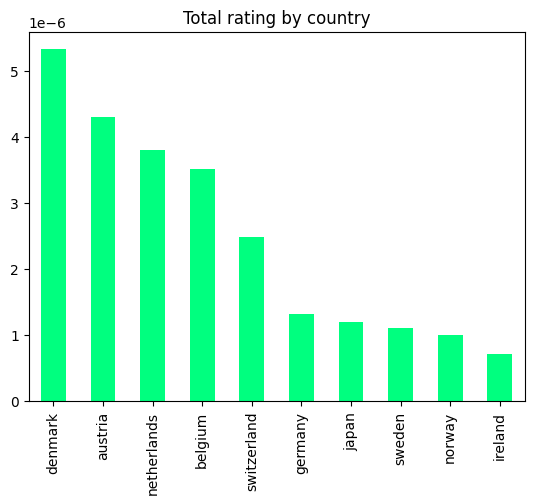

In [56]:
total_df["total_rating"].head(10).plot(
    kind="bar",
    color="springgreen",
    x="country",
    y="total rating",
    title="Total rating by country",
)

## Top 2 importance

Based on the two most important criteria, define which countries are the most attractive for different groups.


### a) A Young Person Up to 27 Years Old

- Education Rating
  - Education is crucial for a young person as it impacts career opportunities and future earning potential.
- Economic Rating
  - Economic stability and opportunities are important as they affect job prospects and financial independence.
- Gender Equality
  - No discrimination based on gender.


In [57]:
# Concatenate with inner join to include only rows with indexes that are present in all DataFrames
# join='outer': Include all rows, filling missing values with NaNs where indexes don’t match.
up_to_27_df = concat(
    [
        education_df[["education_rating"]],
        economic_df[["economic_rating"]],
        ge_df,
    ],
    axis=1,
    join="inner",
)

# Calculate a 'rating' column as the product of the values in the selected columns
up_to_27_df["rating"] = up_to_27_df.prod(axis=1)

# Sort the DataFrame by the 'total_rating' column in descending order
up_to_27_df = up_to_27_df.sort_values(by="rating", axis=0, ascending=False)

# Show only the top 10 rows based on the highest ratings
up_to_27_df.head(10)

,education_rating,economic_rating,gender_equality_index,rating
norway,0.280682,0.017852,1.000000,0.005011
australia,0.202070,0.027073,0.878800,0.004808
iceland,0.302947,0.019782,0.747595,0.004480
denmark,0.234099,0.015134,0.975760,0.003457
singapore,0.193319,0.022919,0.623317,0.002762
new_zealand,0.166254,0.018407,0.858022,0.002626
ireland,0.129631,0.027329,0.732974,0.002597
finland,0.202851,0.012687,0.938823,0.002416
taiwan,0.183630,0.014565,0.846479,0.002264
austria,0.162554,0.015710,0.794536,0.002029


<Axes: title={'center': 'A young person up to 27 years old'}>

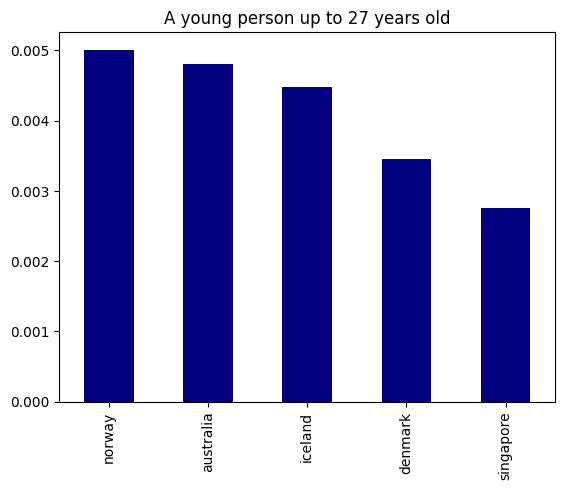

In [58]:
up_to_27_df["rating"].head(5).plot(
    kind="bar",
    color="navy",
    x="country",
    y="rating",
    title="A young person up to 27 years old",
)

### b) A Young Couple Who Are Planning or Already Have Small Children

- Health Rating
  - For families with young children, access to quality healthcare is paramount for the well-being of both parents and children.
- Education Rating
  - Good educational facilities are essential for their children’s development and future success.
- Gender Equality
  - No discrimination based on gender.


In [59]:
# Concatenate with inner join to include only rows with indexes that are present in all DataFrames
# join='outer': Include all rows, filling missing values with NaNs where indexes don’t match.
young_couple_df = concat(
    [
        health_df[["health_rating"]],
        education_df[["education_rating"]],
        ge_df,
    ],
    axis=1,
    join="inner",
)

# Calculate a 'rating' column as the product of the values in the selected columns
young_couple_df["rating"] = young_couple_df.prod(axis=1)

# Sort the DataFrame by the 'total_rating' column in descending order
young_couple_df = young_couple_df.sort_values(by="rating", axis=0, ascending=False)

# Show only the top 10 rows based on the highest ratings
young_couple_df.head(10)

,health_rating,education_rating,gender_equality_index,rating
norway,0.908011,0.280682,1.000000,0.254862
luxembourg,0.887252,0.355262,0.702963,0.221579
iceland,0.923296,0.302947,0.747595,0.209110
denmark,0.866266,0.234099,0.975760,0.197877
sweden,0.932557,0.216764,0.911120,0.184178
finland,0.887686,0.202851,0.938823,0.169052
canada,0.912070,0.222111,0.809157,0.163920
australia,0.922856,0.202070,0.878800,0.163880
germany,0.890863,0.190132,0.894960,0.151590
netherlands,0.887540,0.189694,0.841862,0.141737


<Axes: title={'center': 'A young couple who are planning\n or already have small children'}>

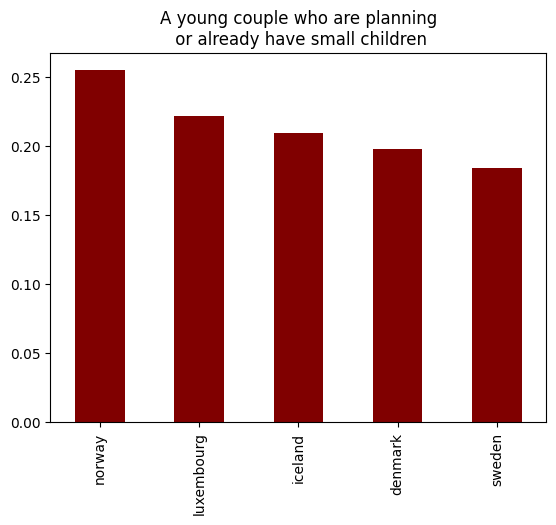

In [60]:
young_couple_df["rating"].head(5).plot(
    kind="bar",
    color="maroon",
    x="country",
    y="rating",
    title="A young couple who are planning\n or already have small children",
)

### c) A Person Who Will Be Retired in a Few Months or Who Has Already Been Retired for a Few Months

- Health Rating
  - Health is the top priority as it directly affects quality of life and medical needs.
- Economic Rating
  - Economic stability is crucial for retirement planning and managing expenses without a regular income.
- Gender Equality
  - No discrimination based on gender.


In [61]:
# Concatenate with inner join to include only rows with indexes that are present in all DataFrames
# join='outer': Include all rows, filling missing values with NaNs where indexes don’t match.
retired_df = concat(
    [
        health_df[["health_rating"]],
        economic_df[["economic_rating"]],
        ge_df,
    ],
    axis=1,
    join="inner",
)

# Calculate a 'rating' column as the product of the values in the selected columns
retired_df["rating"] = retired_df.prod(axis=1)

# Sort the DataFrame by the 'total_rating' column in descending order
retired_df = retired_df.sort_values(by="rating", axis=0, ascending=False)

# Show only the top 10 rows based on the highest ratings
retired_df.head(10)

,health_rating,economic_rating,gender_equality_index,rating
australia,0.922856,0.027073,0.878800,0.021956
ireland,0.863462,0.027329,0.732974,0.017296
norway,0.908011,0.017852,1.000000,0.016210
new_zealand,0.883010,0.018407,0.858022,0.013946
singapore,0.956967,0.022919,0.623317,0.013671
iceland,0.923296,0.019782,0.747595,0.013655
denmark,0.866266,0.015134,0.975760,0.012792
spain,0.892848,0.015663,0.886880,0.012403
estonia,0.719938,0.018502,0.844171,0.011245
austria,0.889219,0.015710,0.794536,0.011100


<Axes: title={'center': 'A person who will be retired in a few months\n or who has already been retired for a few months'}>

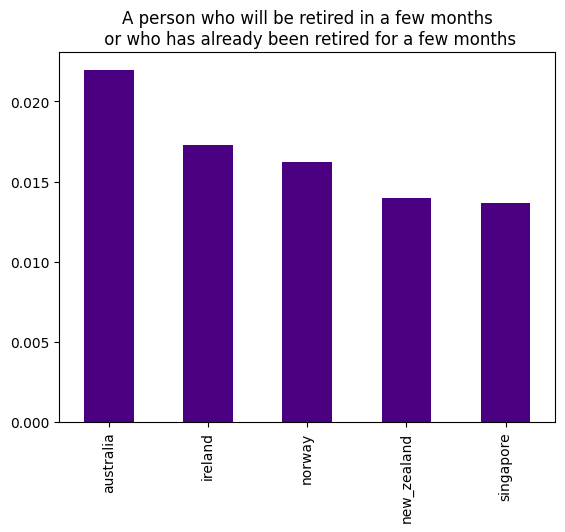

In [62]:
retired_df["rating"].head(5).plot(
    kind="bar",
    color="indigo",
    x="country",
    y="rating",
    title="A person who will be retired in a few months\n or who has already been retired for a few months",
)